In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

import statistics
from collections import Counter

import numpy as np
import pandas as pd
import csv
from functools import reduce

# Import data

In [2]:
p1 = read_csv('ics_data/07_Smart_Meter_65/P1.csv', squeeze=True, index_col=0)
p2 = read_csv('ics_data/07_Smart_Meter_65/P2.csv', squeeze=True, index_col=0)
p3 = read_csv('ics_data/07_Smart_Meter_65/P3.csv', squeeze=True, index_col=0)
q1 = read_csv('ics_data/07_Smart_Meter_65/Q1.csv', squeeze=True, index_col=0)
q2 = read_csv('ics_data/07_Smart_Meter_65/Q2.csv', squeeze=True, index_col=0)
q3 = read_csv('ics_data/07_Smart_Meter_65/Q3.csv', squeeze=True, index_col=0)
u1 = read_csv('ics_data/07_Smart_Meter_65/U1.csv', squeeze=True, index_col=0)
u2 = read_csv('ics_data/07_Smart_Meter_65/U2.csv', squeeze=True, index_col=0)
u3 = read_csv('ics_data/07_Smart_Meter_65/U3.csv', squeeze=True, index_col=0)

/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Fix data

ts
1567102542181      84.16
1567102557196      84.34
1567102572206      84.42
1567102587221      84.29
1567102602231      84.23
1567102617246      84.30
1567102632256      84.43
1567102647266      84.54
1567102662281      84.49
1567102677291      84.33
1567102692306      84.25
1567102707326      97.99
1567102722336    2244.00
1567102737346    2530.20
1567102752356    1055.60
1567102767370    1055.80
1567102782380    1054.80
1567102797395    1055.80
Name: P2, dtype: float64

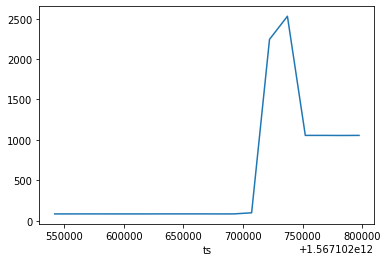

In [3]:
p2[1033582:1033600].plot()
p2[1033582:1033600]

1567102707326 - at least before this it has to be multiplied by 18

In [4]:
def mul_values(dataframe, num):
    new_dataframe = dataframe.copy()
    for (data_index, index) in enumerate(dataframe.index):
        last_data_index = 0
        if index > num:
            last_data_index = data_index - 1
            break
        else:
            new_dataframe.values[data_index] *= 18
    
    return new_dataframe, last_data_index

In [5]:
corner_value = 1567102707326

### P1

In [6]:
p1, last_data_index = mul_values(p1, corner_value)

In [7]:
print(p1[last_data_index - 5 : last_data_index + 5])

ts
1567102632256    733.14
1567102647266    733.50
1567102662281    732.78
1567102677291    730.98
1567102692306    727.02
1567102707326    731.88
1567102722336    816.00
1567102737346    814.40
1567102752356    991.80
1567102767370    986.40
Name: P1, dtype: float64


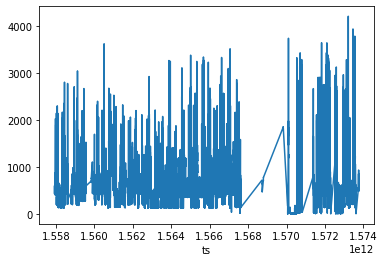

In [8]:
p1.plot()

### P2

In [9]:
p2, last_data_index = mul_values(p2, corner_value)
print(p2[last_data_index - 5 : last_data_index + 5])

ts
1567102632256    1519.74
1567102647266    1521.72
1567102662281    1520.82
1567102677291    1517.94
1567102692306    1516.50
1567102707326    1763.82
1567102722336    2244.00
1567102737346    2530.20
1567102752356    1055.60
1567102767370    1055.80
Name: P2, dtype: float64


### P3

In [10]:
p3, last_data_index = mul_values(p3, corner_value)
print(p3[last_data_index - 5 : last_data_index + 5])

ts
1567102632256    2639.70
1567102647266    2637.36
1567102662281    2639.16
1567102677291    2637.72
1567102692306    2637.36
1567102707326    2349.54
1567102722336    2619.20
1567102737346    2613.60
1567102752356    2612.80
1567102767370    2219.80
Name: P3, dtype: float64


### Q1

In [11]:
q1, last_data_index = mul_values(q1, corner_value)
print(q1[last_data_index - 5 : last_data_index + 5])

ts
1567102632256   -335.52
1567102647266   -336.60
1567102662281   -335.70
1567102677291   -335.88
1567102692306   -334.80
1567102707326   -337.50
1567102722336   -373.20
1567102737346   -370.80
1567102752356   -210.20
1567102767370   -209.40
Name: Q1, dtype: float64


### Q2

In [12]:
q2, last_data_index = mul_values(q2, corner_value)
print(q2[last_data_index - 5 : last_data_index + 5])

ts
1567102632256    1219.86
1567102647266    1222.74
1567102662281    1222.02
1567102677291    1218.60
1567102692306    1216.08
1567102707326    1815.48
1567102722336    2648.80
1567102737346    2532.40
1567102752356     738.40
1567102767370     738.40
Name: Q2, dtype: float64


### Q3

In [13]:
q3, last_data_index = mul_values(q3, corner_value)
print(q3[last_data_index - 5 : last_data_index + 5])

ts
1567102632256     944.28
1567102647266     944.10
1567102662281     930.60
1567102677291     937.44
1567102692306     949.32
1567102707326     964.44
1567102722336    1036.80
1567102737346    1050.00
1567102752356    1036.40
1567102767370     769.40
Name: Q3, dtype: float64


## Fix timestamps

In [14]:
def check_timestamps(dataframe1, dataframe2):
    if len(dataframe1.index) != len(dataframe2.index):
        return False
    return all(dataframe1.index == dataframe2.index)

In [15]:
def fix_timestamps(dataframes):
    # check input
    if len(dataframes) <= 0:
        return
    new_dataframes = []
    
    # get a full list of indices
    indices = dataframes[0].index
    for dataframe in dataframes:
        indices = indices.union(dataframe.index)
    print("Got all indices")
        
    for (data_index, dataframe) in enumerate(dataframes):
        dataframe = dataframe.reindex(indices, copy=True).fillna(method = 'ffill') 
        new_dataframes.append(dataframe)
        print("dataframe", data_index + 1, "is fixed")
        
    return new_dataframes

In [16]:
check_timestamps(p1, p1)

True

In [17]:
data_list = fix_timestamps([p1, p2, p3, q1, q2, q3, u1, u2, u3])
p1 = data_list[0]
p2 = data_list[1]
p3 = data_list[2]
q1 = data_list[3]
q2 = data_list[4]
q3 = data_list[5]
u1 = data_list[6]
u2 = data_list[7]
u3 = data_list[8]

Got all indices
dataframe 1 is fixed
dataframe 2 is fixed
dataframe 3 is fixed
dataframe 4 is fixed
dataframe 5 is fixed
dataframe 6 is fixed
dataframe 7 is fixed
dataframe 8 is fixed
dataframe 9 is fixed


## Check the number of items

In [18]:
# The number is the same => all is ok
print(p1.shape[0])
print(q1.shape[0])
print(u1.shape[0])

2410711
2410711
2410711


In [19]:
def delete_if_shape_less_then_num(dataframes, num):
    new_dataframes = []
    for dataframe in dataframes:
        if len(dataframe) >= num:
            new_dataframes.append(dataframe)
    return new_dataframes

## Split data 

### Delete zeros

In [20]:
def split_by_zeros(dataframes):
    indices_list = [df.index[df.values == 0.0].tolist() for df in dataframes]
    indices = list(set().union(indices_list[0], indices_list[1], indices_list[2], indices_list[3], indices_list[4], indices_list[5], indices_list[6], indices_list[7], indices_list[8]))
    indices.sort()
    if not indices:
        return [[df] for df in dataframes]
    else:
        splitted_dataframes = []
        for dataframe in dataframes:
            splitted_data = []
            start = -1
            end = 0

            for index in indices:
                end = index - 1
                if start != end - 1:
                    splitted_data.append(dataframe.loc[start + 1 : end])
                start = end + 1

            if end != dataframe.index[-1] - 1:
                end = dataframe.index[-1]
                splitted_data.append(dataframe.loc[start + 1 : end])
            splitted_dataframes.append(splitted_data)
        return splitted_dataframes

In [21]:
splitted_data = split_by_zeros([p1, p2, p3, q1, q2, q3, u1, u2, u3])
splitted_p1 = splitted_data[0]
splitted_p2 = splitted_data[1]
splitted_p3 = splitted_data[2]
splitted_q1 = splitted_data[3]
splitted_q2 = splitted_data[4]
splitted_q3 = splitted_data[5]
splitted_u1 = splitted_data[6]
splitted_u2 = splitted_data[7]
splitted_u3 = splitted_data[8]

In [22]:
print(np.count_nonzero(p1.values))
print(np.count_nonzero(p2.values))
print(np.count_nonzero(p3.values))
print(np.count_nonzero(q1.values))
print(np.count_nonzero(q2.values))
print(np.count_nonzero(q3.values))
print(np.count_nonzero(u1.values))
print(np.count_nonzero(u2.values))
print(np.count_nonzero(u3.values))

2410711
2410711
2410711
2410710
2410711
2410710
2410711
2410711
2410711


In [23]:
print(len(splitted_p1), len(splitted_p2), len(splitted_p3))
print(len(splitted_q1), len(splitted_q2), len(splitted_q3))
print(len(splitted_u1), len(splitted_u2), len(splitted_u3))

3 3 3
3 3 3
3 3 3


In [24]:
min_series_len = 50

In [25]:
splitted_p1 = delete_if_shape_less_then_num(splitted_p1, min_series_len)
splitted_p2 = delete_if_shape_less_then_num(splitted_p2, min_series_len)
splitted_p3 = delete_if_shape_less_then_num(splitted_p3, min_series_len)
splitted_q1 = delete_if_shape_less_then_num(splitted_q1, min_series_len)
splitted_q2 = delete_if_shape_less_then_num(splitted_q2, min_series_len)
splitted_q3 = delete_if_shape_less_then_num(splitted_q3, min_series_len)
splitted_u1 = delete_if_shape_less_then_num(splitted_u1, min_series_len)
splitted_u2 = delete_if_shape_less_then_num(splitted_u2, min_series_len)
splitted_u3 = delete_if_shape_less_then_num(splitted_u3, min_series_len)

In [26]:
print(len(splitted_p1), len(splitted_p2), len(splitted_p3))
print(len(splitted_q1), len(splitted_q2), len(splitted_q3))
print(len(splitted_u1), len(splitted_u2), len(splitted_u3))

3 3 3
3 3 3
3 3 3


### Analyze diff between measurements

#### Function to calculate diff

In [27]:
def calculate_diff(array):
    return array.index.to_series().diff().dropna().values

In [28]:
timestamps = calculate_diff(p1)

In [29]:
print(timestamps[:100])

[1385. 2000. 2005. 2015. 1980. 2000. 2000. 2000. 2000. 1995. 2000. 1995.
 2005. 2000. 2000. 2000. 2000. 2005. 2000. 2000. 2000. 2000. 2005. 2005.
 2005. 2005. 2005. 2010. 2000. 1999. 2020. 1985. 2005. 2005. 1995. 2005.
 2000. 2005. 2000. 2000. 2000. 2005. 1995. 2005. 1995. 1995. 2005. 2000.
 2000. 2000. 2000. 2005. 2000. 2000. 1995. 2000. 1995. 2000. 2000. 2005.
 2110. 1890. 2000. 2000. 2005. 2000. 2005. 2005. 2005. 2000. 2005. 2000.
 2005. 2010. 1999. 2005. 2000. 2000. 2005. 2000. 2000. 2000. 2005. 2000.
 2000. 2000. 2000. 2000. 2000. 1995. 2000. 2000. 2005. 2000. 2000. 2000.
 2000. 2005. 2000. 2000.]


### Split measurements by diff

In [30]:
def split_by_timestamps_diff(dataframes, percentage):
    new_dataframes = []
    
    for dataframe in dataframes:
        diff = calculate_diff(dataframe)
        start = end = 0
        for (index, step) in enumerate(diff):
            if index == 0:
                continue
            elif abs((step - diff[index-1]) / diff[index-1]) > percentage:
                end = index - 1
                new_dataframes.append(dataframe.loc[dataframe.index[start] : dataframe.index[end]])
                start = end = index
            elif index == len(diff) - 1:
                end = index
                new_dataframes.append(dataframe.loc[start : end])
            else:
                end = index
    
    return new_dataframes

In [31]:
# split if timestamps differ > 15%
percentage = 0.15

In [32]:
splitted_p1 = split_by_timestamps_diff(splitted_p1, percentage)
splitted_p2 = split_by_timestamps_diff(splitted_p2, percentage)
splitted_p3 = split_by_timestamps_diff(splitted_p3, percentage)
splitted_q1 = split_by_timestamps_diff(splitted_q1, percentage)
splitted_q2 = split_by_timestamps_diff(splitted_q2, percentage)
splitted_q3 = split_by_timestamps_diff(splitted_q3, percentage)
splitted_u1 = split_by_timestamps_diff(splitted_u1, percentage)
splitted_u2 = split_by_timestamps_diff(splitted_u2, percentage)
splitted_u3 = split_by_timestamps_diff(splitted_u3, percentage)

In [33]:
print(len(splitted_p1))

197107


In [34]:
splitted_p1 = delete_if_shape_less_then_num(splitted_p1, min_series_len)
splitted_p2 = delete_if_shape_less_then_num(splitted_p2, min_series_len)
splitted_p3 = delete_if_shape_less_then_num(splitted_p3, min_series_len)
splitted_q1 = delete_if_shape_less_then_num(splitted_q1, min_series_len)
splitted_q2 = delete_if_shape_less_then_num(splitted_q2, min_series_len)
splitted_q3 = delete_if_shape_less_then_num(splitted_q3, min_series_len)
splitted_u1 = delete_if_shape_less_then_num(splitted_u1, min_series_len)
splitted_u2 = delete_if_shape_less_then_num(splitted_u2, min_series_len)
splitted_u3 = delete_if_shape_less_then_num(splitted_u3, min_series_len)

In [35]:
len(splitted_p1)

6581

#### Overview of splitted data

По графикам заметно, что в датасете есть совершенно разные данные - как стационарные, так и нестационарные (при наличии скачков)

ts
1557933322506    442.98
1557933324506    442.98
1557933326511    442.44
1557933328526    442.44
1557933330506    442.08
                  ...  
1557936680578    600.84
1557936682578    601.02
1557936684583    601.38
1557936686583    601.74
1557936688583    601.56
Name: P1, Length: 1683, dtype: float64
ts
1557943418703    443.16
1557943420703    442.26
1557943422703    442.26
1557943424708    442.44
1557943426708    442.98
                  ...  
1557944369302    442.80
1557944371302    442.80
1557944373307    442.80
1557944375307    441.90
1557944377417    442.80
Name: P1, Length: 480, dtype: float64


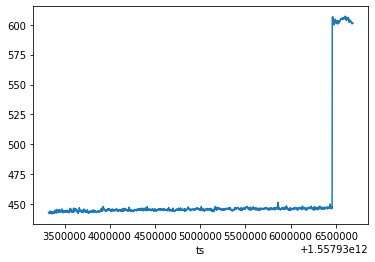

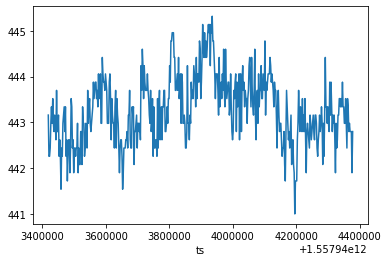

In [36]:
print(splitted_p1[0])
splitted_p1[0].plot()

plt.figure()
print(splitted_p1[5])
splitted_p1[5].plot()

## Convert timestamps to datetime

In [37]:
def convert_timestamps(dataframes):
    for df in dataframes:
        df.index = pd.to_datetime(df.index, unit='ms')
    return dataframes

In [38]:
splitted_p1 = convert_timestamps(splitted_p1)
splitted_p2 = convert_timestamps(splitted_p2)
splitted_p3 = convert_timestamps(splitted_p3)
splitted_q1 = convert_timestamps(splitted_q1)
splitted_q2 = convert_timestamps(splitted_q2)
splitted_q3 = convert_timestamps(splitted_q3)
splitted_u1 = convert_timestamps(splitted_u1)
splitted_u2 = convert_timestamps(splitted_u2)
splitted_u3 = convert_timestamps(splitted_u3)

In [39]:
splitted_p1[0]

ts
2019-05-15 15:15:22.506    442.98
2019-05-15 15:15:24.506    442.98
2019-05-15 15:15:26.511    442.44
2019-05-15 15:15:28.526    442.44
2019-05-15 15:15:30.506    442.08
                            ...  
2019-05-15 16:11:20.578    600.84
2019-05-15 16:11:22.578    601.02
2019-05-15 16:11:24.583    601.38
2019-05-15 16:11:26.583    601.74
2019-05-15 16:11:28.583    601.56
Name: P1, Length: 1683, dtype: float64

### Explore timestamps

Timestamps differ from sample to sample

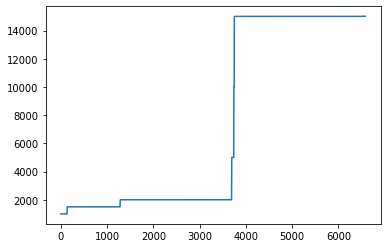

In [40]:
sorted_p1 = [calculate_diff(df).mean().astype('timedelta64[ms]').astype(int) for df in splitted_p1]
sorted_p1.sort()
plt.plot(range(len(sorted_p1)), sorted_p1)

In [41]:
sorted_p1

[997,
 997,
 998,
 998,
 998,
 998,
 998,
 998,
 998,
 998,
 998,
 998,
 998,
 998,
 998,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1001,
 1001,
 1001,
 1001,
 1001,
 1001,
 1498,
 1498,
 1499,
 1499,
 1499,
 1499,
 1499,
 1499,
 1499,
 1499,
 1499,
 1499,
 1499,
 1499,
 1500,

In [42]:
sorted_p1[130:140] # jump from ~1000 to ~1500, separation: 900 < and < 1100 - first part, > 1400 - second part

[1001, 1001, 1001, 1001, 1001, 1498, 1498, 1499, 1499, 1499]

In [43]:
sorted_p1[1275:1285] # jump from ~1500 to ~2000, separation: < 1600 - first part, > 1900 - second part

[1501, 1501, 1501, 1502, 1502, 1997, 1999, 1999, 1999, 1999]

In [44]:
sorted_p1[3685:3695] # jump from ~2000 to ~5000, separation: < 2100 - first part, > 4900 - second part

[2001, 2001, 2002, 2002, 2002, 3001, 5002, 5003, 5003, 5003]

In [45]:
sorted_p1[3735:3750] # jump from ~5000 to ~15000, separation: < 5100 - first part, > 14900 - second part

[5003,
 5003,
 9999,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10001,
 14998,
 14999,
 15000]

### Split and save data

In [46]:
def split_and_save_data(dataframes, name):
    count_1000 = 0
    count_1500 = 0
    count_2000 = 0
    count_5000 = 0
    count_15000 = 0
    
    df_1000 = []
    df_1500 = []
    df_2000 = []
    df_5000 = []
    df_15000 = []
    
    for df in dataframes:
        count = calculate_diff(df).mean().astype('timedelta64[ms]').astype(int)
        if count > 900 and count < 1100:
            df = df.resample('s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/07_Smart_Meter_65/" + name + "/1000/" + str(count_1000) + ".csv", header=True, index=True, encoding='utf-8')
            count_1000 += 1
            df.resample('1500ms').nearest(limit=1)
            df_1000.append(df)
        elif count > 1400 and count < 1600:
            df = df.resample('1500ms').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/07_Smart_Meter_65/" + name + "/1500/" + str(count_1500) + ".csv", header=True, index=True, encoding='utf-8')
            count_1500 += 1
            df_1500.append(df)
        elif count > 1900 and count < 2100:
            df = df.resample('2s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/07_Smart_Meter_65/" + name + "/2000/" + str(count_2000) + ".csv", header=True, index=True, encoding='utf-8')
            count_2000 += 1
            df_2000.append(df)
        elif count > 4900 and count < 5100:
            df = df.resample('5s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/07_Smart_Meter_65/" + name + "/5000/" + str(count_5000) + ".csv", header=True, index=True, encoding='utf-8')
            count_5000 += 1
            df_5000.append(df)
        elif count > 14900 and count < 15100:
            df = df.resample('15s').nearest(limit=1)
            df.to_csv("ics_data_preprocessed/07_Smart_Meter_65/" + name + "/15000/" + str(count_15000) + ".csv", header=True, index=True, encoding='utf-8')
            count_15000 += 1
            df_15000.append(df)
            
    return [df_1000, df_1500, df_2000, df_5000, df_15000]
    

In [47]:
resulted_p1 = split_and_save_data(splitted_p1, "P1")
resulted_p2 = split_and_save_data(splitted_p2, "P2")
resulted_p3 = split_and_save_data(splitted_p3, "P3")
resulted_q1 = split_and_save_data(splitted_q1, "Q1")
resulted_q2 = split_and_save_data(splitted_q2, "Q2")
resulted_q3 = split_and_save_data(splitted_q3, "Q3")
resulted_u1 = split_and_save_data(splitted_u1, "U1")
resulted_u2 = split_and_save_data(splitted_u2, "U2")
resulted_u3 = split_and_save_data(splitted_u3, "U3")

In [48]:
p1_1000 = resulted_p1[0]
p1_1500 = resulted_p1[1]
p1_2000 = resulted_p1[2]
p1_5000 = resulted_p1[3]
p1_15000 = resulted_p1[4]

p2_1000 = resulted_p2[0]
p2_1500 = resulted_p2[1]
p2_2000 = resulted_p2[2]
p2_5000 = resulted_p2[3]
p2_15000 = resulted_p2[4]

p3_1000 = resulted_p3[0]
p3_1500 = resulted_p3[1]
p3_2000 = resulted_p3[2]
p3_5000 = resulted_p3[3]
p3_15000 = resulted_p3[4]

In [49]:
q1_1000 = resulted_q1[0]
q1_1500 = resulted_q1[1]
q1_2000 = resulted_q1[2]
q1_5000 = resulted_q1[3]
q1_15000 = resulted_q1[4]

q2_1000 = resulted_q2[0]
q2_1500 = resulted_q2[1]
q2_2000 = resulted_q2[2]
q2_5000 = resulted_q2[3]
q2_15000 = resulted_q2[4]

q3_1000 = resulted_q3[0]
q3_1500 = resulted_q3[1]
q3_2000 = resulted_q3[2]
q3_5000 = resulted_q3[3]
q3_15000 = resulted_q3[4]

In [50]:
u1_1000 = resulted_u1[0]
u1_1500 = resulted_u1[1]
u1_2000 = resulted_u1[2]
u1_5000 = resulted_u1[3]
u1_15000 = resulted_u1[4]

u2_1000 = resulted_u2[0]
u2_1500 = resulted_u2[1]
u2_2000 = resulted_u2[2]
u2_5000 = resulted_u2[3]
u2_15000 = resulted_u2[4]

u3_1000 = resulted_u3[0]
u3_1500 = resulted_u3[1]
u3_2000 = resulted_u3[2]
u3_5000 = resulted_u3[3]
u3_15000 = resulted_u3[4]

In [51]:
# just to free some space
del splitted_p1
del splitted_p2
del splitted_p3
del splitted_q1
del splitted_q2
del splitted_q3
del splitted_u1
del splitted_u2
del splitted_u3

In [52]:
del resulted_p1
del resulted_p2
del resulted_p3
del resulted_q1
del resulted_q2
del resulted_q3
del resulted_u1
del resulted_u2
del resulted_u3

# Статистические параметры

## Среднее

In [53]:
p1_1000_means = [df.mean() for df in p1_1000]
p1_1500_means = [df.mean() for df in p1_1500]
p1_2000_means = [df.mean() for df in p1_2000]
p1_5000_means = [df.mean() for df in p1_5000]
p1_15000_means = [df.mean() for df in p1_15000]

Судя по выходу следующей ячейки, среднее значение "кусков" данных отличаются

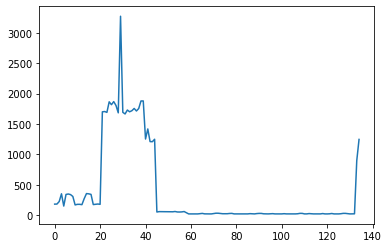

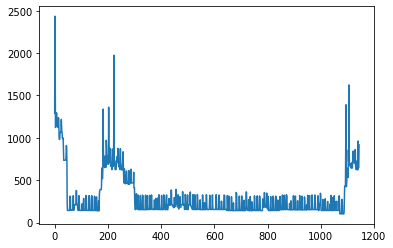

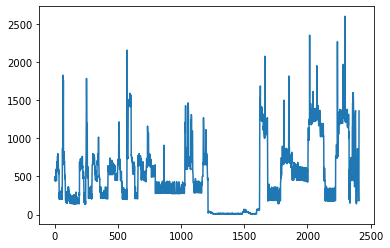

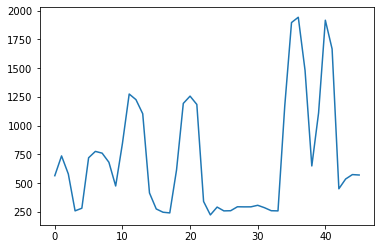

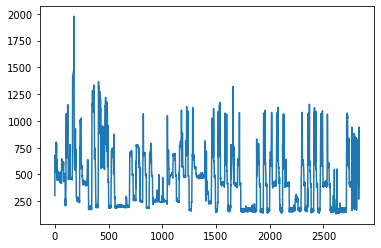

In [54]:
plt.figure()
plt.plot(range(len(p1_1000_means)),p1_1000_means)

plt.figure()
plt.plot(range(len(p1_1500_means)),p1_1500_means)

plt.figure()
plt.plot(range(len(p1_2000_means)),p1_2000_means)

plt.figure()
plt.plot(range(len(p1_5000_means)),p1_5000_means)

plt.figure()
plt.plot(range(len(p1_15000_means)),p1_15000_means)

## Медиана

In [55]:
p1_1000_medians = [df.median() for df in p1_1000]
p1_1500_medians = [df.median() for df in p1_1500]
p1_2000_medians = [df.median() for df in p1_2000]
p1_5000_medians = [df.median() for df in p1_5000]
p1_15000_medians = [df.median() for df in p1_15000]

Медианы тоже отличаются

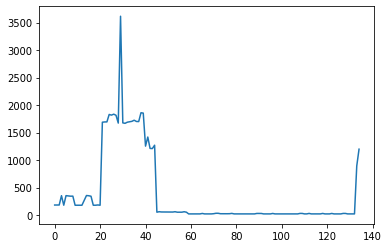

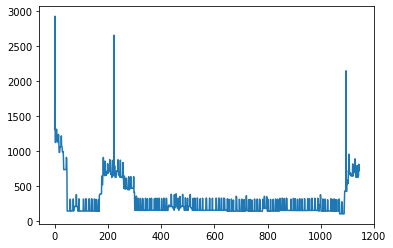

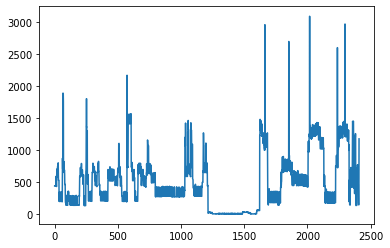

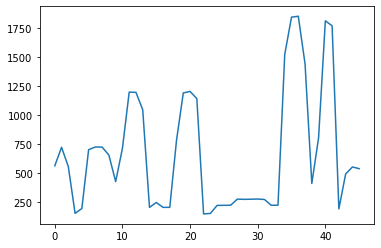

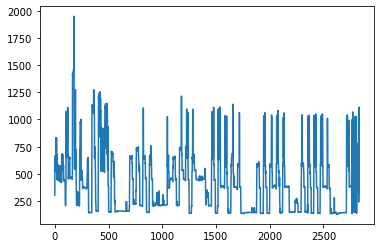

In [56]:
plt.figure()
plt.plot(range(len(p1_1000_medians)),p1_1000_medians)

plt.figure()
plt.plot(range(len(p1_1500_medians)),p1_1500_medians)

plt.figure()
plt.plot(range(len(p1_2000_medians)),p1_2000_medians)

plt.figure()
plt.plot(range(len(p1_5000_medians)),p1_5000_medians)

plt.figure()
plt.plot(range(len(p1_15000_medians)),p1_15000_medians)

## Variance

In [57]:
p1_1000_vars = [df.var() for df in p1_1000]
p1_1500_vars = [df.var() for df in p1_1500]
p1_2000_vars = [df.var() for df in p1_2000]
p1_5000_vars = [df.var() for df in p1_5000]
p1_15000_vars = [df.var() for df in p1_15000]

Также отличается и varience

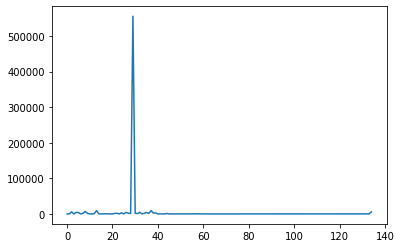

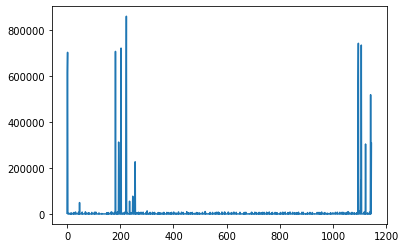

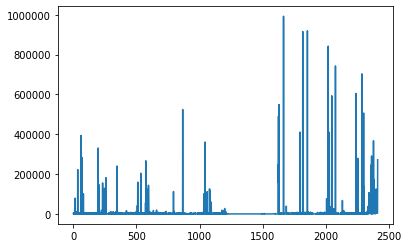

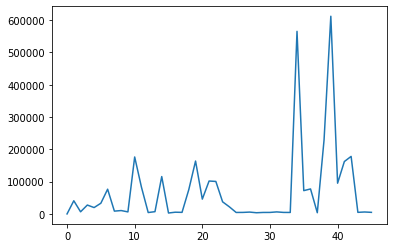

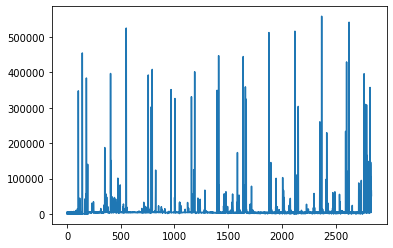

In [58]:
plt.figure()
plt.plot(range(len(p1_1000_vars)),p1_1000_vars)

plt.figure()
plt.plot(range(len(p1_1500_vars)),p1_1500_vars)

plt.figure()
plt.plot(range(len(p1_2000_vars)),p1_2000_vars)

plt.figure()
plt.plot(range(len(p1_5000_vars)),p1_5000_vars)

plt.figure()
plt.plot(range(len(p1_15000_vars)),p1_15000_vars)

## Автокорреляция

Показатели автокорреляции также отличаются для разных частей

In [59]:
p1_1000_autocorr = [df.autocorr() for df in p1_1000]
p1_1500_autocorr = [df.autocorr() for df in p1_1500]
p1_2000_autocorr = [df.autocorr() for df in p1_2000]
p1_5000_autocorr = [df.autocorr() for df in p1_5000]
p1_15000_autocorr = [df.autocorr() for df in p1_15000]

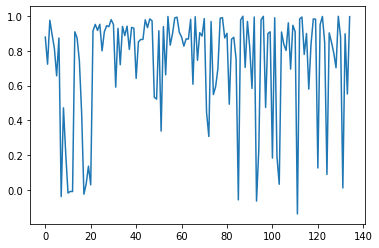

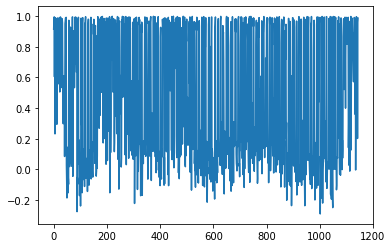

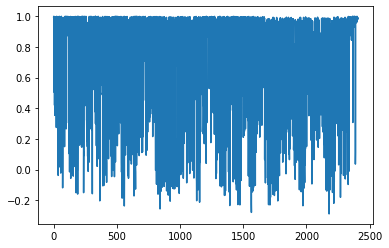

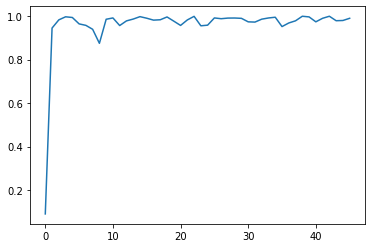

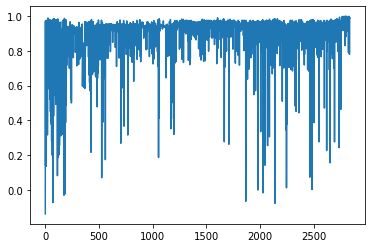

In [60]:
plt.figure()
plt.plot(range(len(p1_1000_autocorr)),p1_1000_autocorr)

plt.figure()
plt.plot(range(len(p1_1500_autocorr)),p1_1500_autocorr)

plt.figure()
plt.plot(range(len(p1_2000_autocorr)),p1_2000_autocorr)

plt.figure()
plt.plot(range(len(p1_5000_autocorr)),p1_5000_autocorr)

plt.figure()
plt.plot(range(len(p1_15000_autocorr)),p1_15000_autocorr)

## Dickey-Fuller test

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
p1_1000_adfuller = [adfuller(df.values) for df in p1_1000]
p1_1500_adfuller = [adfuller(df.values) for df in p1_1500]
p1_2000_adfuller = [adfuller(df.values) for df in p1_2000]
p1_5000_adfuller = [adfuller(df.values) for df in p1_5000]
p1_15000_adfuller = [adfuller(df.values) for df in p1_15000]

In [63]:
p1_1500

[ts
 2019-10-31 13:19:58.500    1142.0
 2019-10-31 13:20:00.000    1142.0
 2019-10-31 13:20:01.500    1141.8
 2019-10-31 13:20:03.000    1143.4
 2019-10-31 13:20:04.500    1142.0
                             ...  
 2019-10-31 13:31:12.000    1301.8
 2019-10-31 13:31:13.500    1301.6
 2019-10-31 13:31:15.000    1302.0
 2019-10-31 13:31:16.500    1302.0
 2019-10-31 13:31:18.000    1302.6
 Freq: 1500L, Name: P1, Length: 454, dtype: float64,
 ts
 2019-10-31 13:31:22.500    1304.4
 2019-10-31 13:31:24.000    1304.4
 2019-10-31 13:31:25.500    1301.0
 2019-10-31 13:31:27.000    1301.4
 2019-10-31 13:31:28.500    1302.0
                             ...  
 2019-10-31 13:33:57.000    2925.8
 2019-10-31 13:33:58.500    2927.4
 2019-10-31 13:34:00.000    2926.4
 2019-10-31 13:34:01.500    2927.4
 2019-10-31 13:34:03.000    2927.6
 Freq: 1500L, Name: P1, Length: 108, dtype: float64,
 ts
 2019-10-31 13:34:07.500    2929.8
 2019-10-31 13:34:09.000    2929.8
 2019-10-31 13:34:10.500    2930.8
 2019-1

In [64]:
p1_1000_adfuller_p = [df[1] for df in p1_1000_adfuller]
p1_1500_adfuller_p = [df[1] for df in p1_1500_adfuller]
p1_2000_adfuller_p = [df[1] for df in p1_2000_adfuller]
p1_5000_adfuller_p = [df[1] for df in p1_5000_adfuller]
p1_15000_adfuller_p = [df[1] for df in p1_15000_adfuller]

p заметно отличается для разных отрезков => у нас много промежутков с нестационарными показателями => стандартная ARIMA не даст адекватного результата на большей части из них, так как данные нестационарны

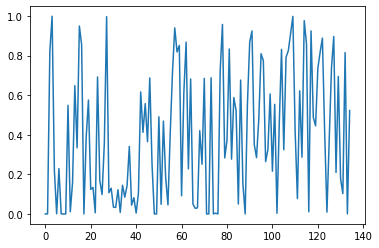

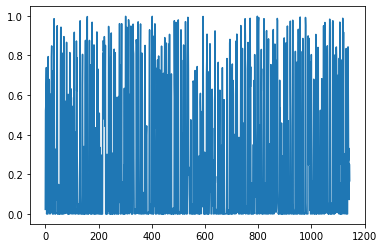

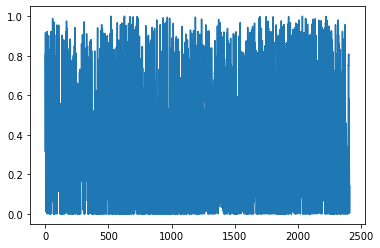

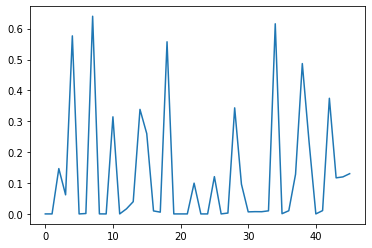

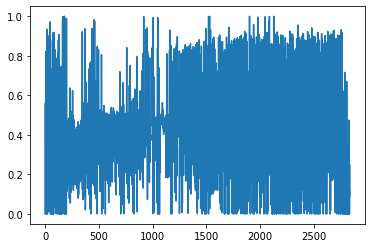

In [65]:
plt.figure()
plt.plot(range(len(p1_1000_adfuller_p)),p1_1000_adfuller_p)

plt.figure()
plt.plot(range(len(p1_1500_adfuller_p)),p1_1500_adfuller_p)

plt.figure()
plt.plot(range(len(p1_2000_adfuller_p)),p1_2000_adfuller_p)

plt.figure()
plt.plot(range(len(p1_5000_adfuller_p)),p1_5000_adfuller_p)

plt.figure()
plt.plot(range(len(p1_15000_adfuller_p)),p1_15000_adfuller_p)